In [ ]:
import tensorflow as tf
assert tf.__version__.startswith('2')

import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
tf.__version__

'2.2.0'

Sometimes the file is cannot be extracted. Run this in that case

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
PATH = "/content/gdrive/Shared drives/Bangkit Data/Bany/train"

In [ ]:
os.listdir(PATH)

['cmd', 'cbsd', 'cbb', 'healthy', 'cgm']

In [ ]:
base_dir = PATH

In [ ]:
IMAGE_SIZE = 224
BATCH_SIZE = 64

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255, 
    validation_split=0.2)

train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE, 
    subset='training')

val_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    shuffle=False, 
    subset='validation')

Found 4527 images belonging to 5 classes.
Found 1129 images belonging to 5 classes.


In [ ]:
print (train_generator.class_indices)

{'cbb': 0, 'cbsd': 1, 'cgm': 2, 'cmd': 3, 'healthy': 4}


In [ ]:
for image_batch, label_batch in train_generator:
  break
image_batch.shape, label_batch.shape

((64, 224, 224, 3), (64, 5))

In [ ]:
IMG_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, 3)

# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                              include_top=False, 
                                              weights='imagenet')

9412608/9406464 [==============================] - 0s 0us/step


In [ ]:
base_model.trainable = False

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape = (224, 224, 3)),
  #tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(5, activation='softmax')
])
print('Base model ready')

Base model ready


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
flatten (Flatten)            (None, 394272)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                25233472  
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 325       
Total params: 25,234,693
Trainable params: 25,234,693
Non-trainable params: 0
_________________________________________________________________


In [ ]:
epochs = 10

history = model.fit(train_generator, 
                    steps_per_epoch=len(train_generator), 
                    epochs=epochs, 
                    validation_data=val_generator, 
                    validation_steps=len(val_generator)
                    )

Epoch 1/10
71/71 [==============================] - 1642s 23s/step - loss: 4.3246 - accuracy: 0.4243 - val_loss: 1.3530 - val_accuracy: 0.4703
Epoch 2/10
71/71 [==============================] - 167s 2s/step - loss: 1.2945 - accuracy: 0.5010 - val_loss: 1.2606 - val_accuracy: 0.5297
Epoch 3/10
71/71 [==============================] - 167s 2s/step - loss: 1.0544 - accuracy: 0.6013 - val_loss: 1.1922 - val_accuracy: 0.5651
Epoch 4/10
71/71 [==============================] - 171s 2s/step - loss: 0.6254 - accuracy: 0.7784 - val_loss: 1.2059 - val_accuracy: 0.5802
Epoch 5/10
71/71 [==============================] - 169s 2s/step - loss: 0.3038 - accuracy: 0.9121 - val_loss: 1.4302 - val_accuracy: 0.5669
Epoch 6/10
71/71 [==============================] - 169s 2s/step - loss: 0.1524 - accuracy: 0.9680 - val_loss: 1.5697 - val_accuracy: 0.5810
Epoch 7/10
71/71 [==============================] - 170s 2s/step - loss: 0.0688 - accuracy: 0.9901 - val_loss: 1.7413 - val_accuracy: 0.5722
Epoch 8/10


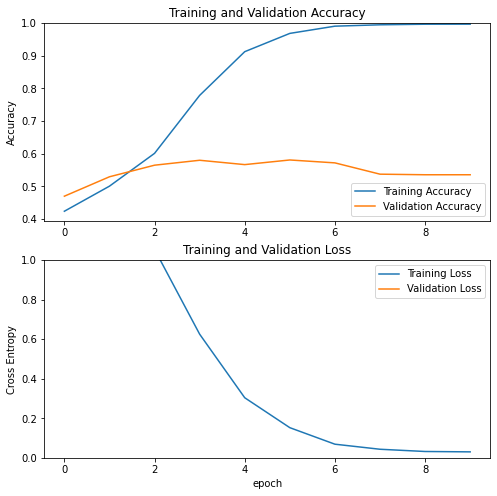

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
model.save("/content/gdrive/Shared drives/Bangkit Data/Bany/model3/my_model_1020PM.h5") 

In [ ]:
val_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    shuffle=False, 
    subset='validation')

Found 1129 images belonging to 5 classes.


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

classes = np.argmax(model.predict(val_generator), axis=-1)
y_true = val_generator.classes
predict = model.predict(val_generator, steps=len(val_generator), verbose=1)

18/18 [==============================] - 18s 1s/step


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Accuracy: 0.535872
Precision: 0.535872
Recall: 0.535872
F1 score: 0.535872
              precision    recall  f1-score   support

           0       0.50      0.06      0.11        93
           1       0.54      0.62      0.58       288
           2       0.16      0.18      0.17       154
           3       0.64      0.74      0.68       531
           4       0.00      0.00      0.00        63

    accuracy                           0.54      1129
   macro avg       0.37      0.32      0.31      1129
weighted avg       0.50      0.54      0.50      1129



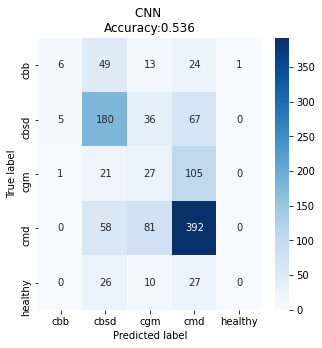

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy = accuracy_score(y_true, classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_true, classes,  average='micro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_true, classes,  average='micro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_true, classes, average='micro')
print('F1 score: %f' % f1)
# kappa
#kappa = cohen_kappa_score(y_true, classes)
#print('Cohens kappa: %f' % kappa)
# ROC AUC
#auc = roc_auc_score(y_true, predict,multi_class='ovo')
#print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_true, classes)
#print(matrix)
print(classification_report(y_true, classes))

cm_df = pd.DataFrame(matrix,
                     index = ['cbb','cbsd','cgm', 'cmd', 'healthy'], 
                     columns = ['cbb','cbsd','cgm', 'cmd', 'healthy'])

plt.figure(figsize=(5,5))
sn.heatmap(cm_df, annot=True,cmap='Blues', fmt='g')
plt.title('CNN \nAccuracy:{0:.3f}'.format(accuracy_score(y_true, classes)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images/255.0, batch_size=10)
  print(fn)
  print(classes)

Saving train-cbb-372.jpg to train-cbb-372.jpg
train-cbb-372.jpg
[[0.03324801 0.02743428 0.0038923  0.01716809 0.91825736]]


In [ ]:
pip install tensorflowjs

     |████████████████████████████████| 61kB 1.8MB/s 
     |████████████████████████████████| 144.4MB 90kB/s 
     |████████████████████████████████| 92kB 7.8MB/s 
     |████████████████████████████████| 256kB 43.1MB/s 
     |████████████████████████████████| 921kB 37.9MB/s 
  Created wheel for PyInquirer: filename=PyInquirer-1.0.3-cp36-none-any.whl size=32851 sha256=822a556cf95de006ba0accb241a75e457cbc9bfdb50bef472e029d5f7e4d952f
  Stored in directory: /root/.cache/pip/wheels/52/6c/b1/3e4b0e8daf42a92883c7641c0ea8ffb62e0490ebed2faa55ad
Successfully built PyInquirer
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Found existing installation: Pygments 2.1.3
    Uninstalling Pygments-2.1.3:
      Successfully uninstalled Pygments-2.1.3
  Found existing installation: tensorflow-hub 0.

In [ ]:
import tensorflowjs as tfjs
tfjs_target_dir = "/content/gdrive/Shared drives/Bangkit Data/Bany/model3/js2"
tfjs.converters.save_keras_model(model, tfjs_target_dir)

/usr/local/lib/python3.6/dist-packages/tensorflowjs/converters/keras_h5_conversion.py:122: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  return h5py.File(h5file)
